![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# DATA AUGMENTATION

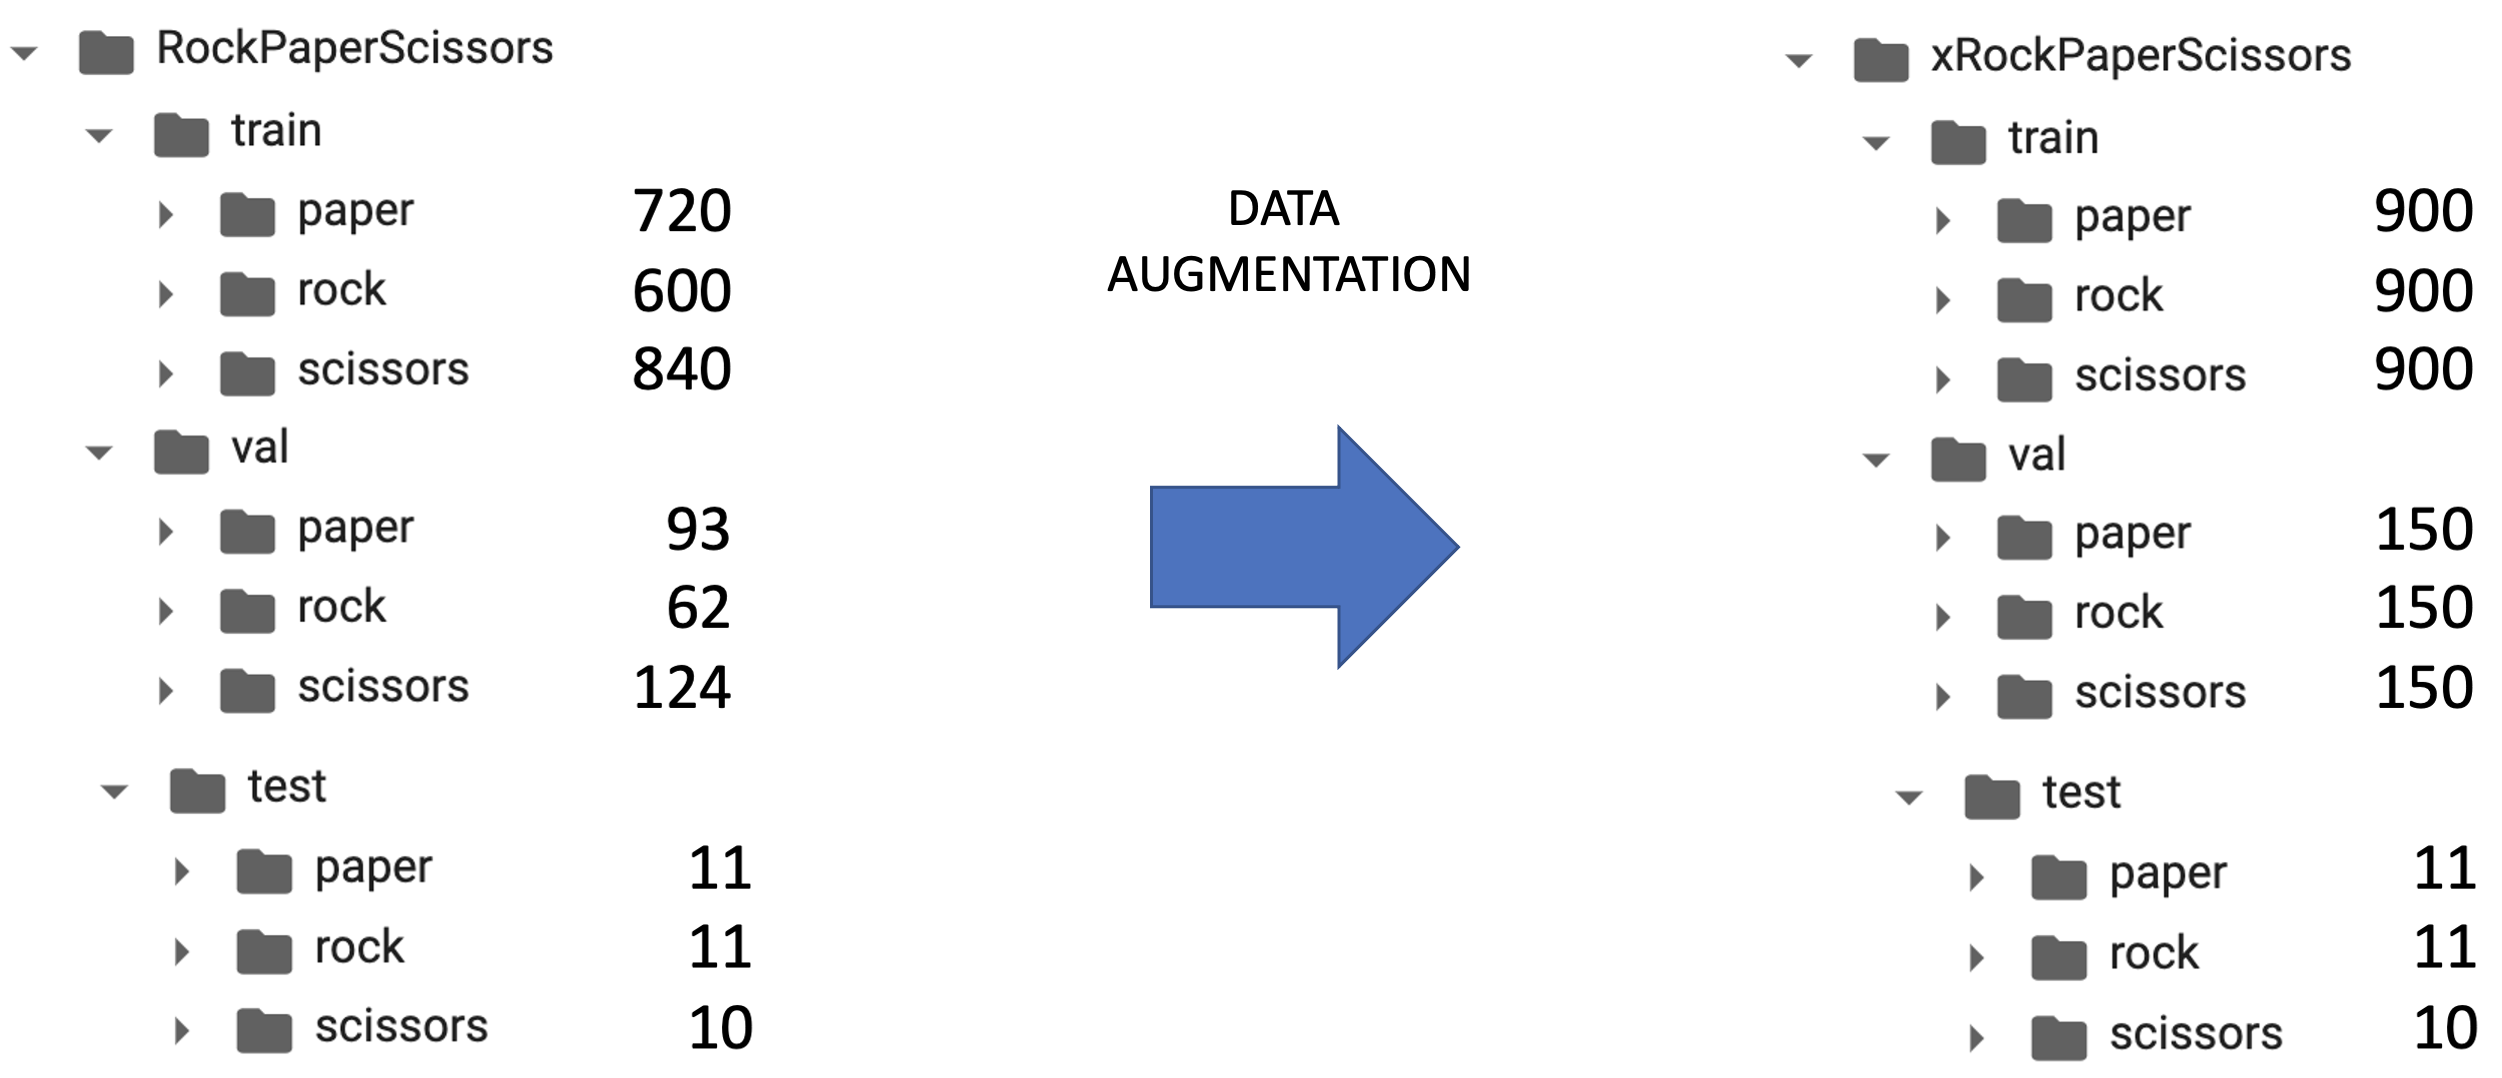

# Original dataset

In [ ]:
# Rock+Paper+Scissors: 3 classes (toy example)
!wget https://www.dropbox.com/s/lz8ci7zwb3hbzlx/RockPaperScissors.zip
!unzip -qq RockPaperScissors.zip
fpath = 'RockPaperScissors/'

--2023-10-25 14:07:47--  https://www.dropbox.com/s/lz8ci7zwb3hbzlx/RockPaperScissors.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/lz8ci7zwb3hbzlx/RockPaperScissors.zip [following]
--2023-10-25 14:07:49--  https://www.dropbox.com/s/raw/lz8ci7zwb3hbzlx/RockPaperScissors.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce3751cc17a4d10023e180a1689.dl.dropboxusercontent.com/cd/0/inline/CGT3DyuIps0qkKd2EygcqvF7zaFYsFbgChnp0IS6sMohqkvlvolkMQ9PFB6O4hKqR6bZ7meK2SALmCa_Z44cDyWsOC45EQg6-E_pcf_WcMHLTknoObCpUKC06985Q6lwwiE/file# [following]
--2023-10-25 14:07:50--  https://uce3751cc17a4d10023e180a1689.dl.dropboxusercontent.com/cd/0/inline/CGT3DyuIps0qkKd2EygcqvF7zaFYsFbgChnp0IS6sMohqkvlvolkMQ9PFB6O4hKqR6bZ7meK2SALmCa_Z44cDyWsOC45E

In [ ]:
# removing some images to make the dataset unbalanced
!rm {fpath}train/paper/paper07*.jpg
!rm {fpath}train/rock/rock03*.jpg
!rm {fpath}train/rock/rock04*.jpg

!rm {fpath}val/paper/testpaper04*.jpg
!rm {fpath}val/rock/testrock04*.jpg
!rm {fpath}val/rock/testrock03*.jpg

!rm {fpath}test/scissors/scissors9*.jpg


# Functions

In [ ]:
import os,fnmatch

In [ ]:
def dirfiles(fpath,fext):
    fnames = fnmatch.filter(sorted(os.listdir(fpath)),fext)
    if '.DS_Store' in fnames:
        fnames.remove('.DS_Store')
    return fnames
def dirdir(fpath):
    fnames = sorted(os.listdir(fpath))
    if '.DS_Store' in fnames:
        fnames.remove('.DS_Store')
    return fnames

def imagesxclass(fpath,fext='*.jpg'):
  fdir = dirdir(fpath)
  for i in range(len(fdir)):
    x = dirfiles(fpath+'/'+fdir[i]+'/',fext)
    print(i,fdir[i],len(x))



# Instalation of Library Augmentor

See [Quick Reference](https://augmentor.readthedocs.io/en/stable/)

In [ ]:
!pip install Augmentor

In [ ]:
import Augmentor

In [ ]:
# INCLUDE HERE THE AUGMENTATION FUNCTIONS
def augment(set_name,N):
  ldir = dirdir(PATH_ORIGINAL+set_name)
  for i in range(len(ldir)):
    print('processing '+ldir[i])
    p0 = Augmentor.Pipeline(PATH_ORIGINAL+set_name+'/'+ldir[i],output_directory='../../../'+PATH_AUGMENTED+set_name+'/'+ldir[i])
    p0.set_seed(0)
    #p0.rotate90(probability=0.25)
    #p0.rotate180(probability=0.25)
    #p0.rotate270(probability=0.25)
    p0.flip_left_right(probability=0.5)
    #p0.skew(probability=0.5)
    #p0.flip_random(probability=0.25)
    p0.sample(N)

# Augmentation of Train/Val Subsets

In [ ]:
PATH_ORIGINAL  = fpath
PATH_AUGMENTED = 'x'+fpath

In [ ]:
print('Original-Train:')
imagesxclass(PATH_ORIGINAL+'train')
print('Original-Val:')
imagesxclass(PATH_ORIGINAL+'val')
print('Original-Test:')
imagesxclass(PATH_ORIGINAL+'test')


Original-Train:
0 paper 720
1 rock 600
2 scissors 840
Original-Val:
0 paper 93
1 rock 62
2 scissors 124
Original-Test:
0 paper 11
1 rock 11
2 scissors 10


In [ ]:
!mkdir {PATH_AUGMENTED}
!mkdir {PATH_AUGMENTED}train
!mkdir {PATH_AUGMENTED}val

In [ ]:
augment('train',900) # each class will be have 900 samples
augment('val',150)   # each class will be have 150 samples


processing paper
Initialised with 720 image(s) found.
Output directory set to RockPaperScissors/train/paper/../../../xRockPaperScissors/train/paper.

Processing <PIL.Image.Image image mode=RGB size=300x300 at 0x7BB71806F430>: 100%|██████████| 900/900 [00:03<00:00, 268.53 Samples/s]


processing rock
Initialised with 600 image(s) found.
Output directory set to RockPaperScissors/train/rock/../../../xRockPaperScissors/train/rock.

Processing <PIL.Image.Image image mode=RGB size=300x300 at 0x7BB718141DE0>: 100%|██████████| 900/900 [00:03<00:00, 248.37 Samples/s]


processing scissors
Initialised with 840 image(s) found.
Output directory set to RockPaperScissors/train/scissors/../../../xRockPaperScissors/train/scissors.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300 at 0x7BB6FC7E7DC0>: 100%|██████████| 900/900 [00:04<00:00, 217.39 Samples/s]


processing paper
Initialised with 93 image(s) found.
Output directory set to RockPaperScissors/val/paper/../../../xRockPaperScissors/val/paper.

Processing <PIL.Image.Image image mode=RGB size=300x300 at 0x7BB718143070>: 100%|██████████| 150/150 [00:01<00:00, 91.72 Samples/s] 


processing rock
Initialised with 62 image(s) found.
Output directory set to RockPaperScissors/val/rock/../../../xRockPaperScissors/val/rock.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300 at 0x7BB718141390>: 100%|██████████| 150/150 [00:00<00:00, 166.22 Samples/s]


processing scissors
Initialised with 124 image(s) found.
Output directory set to RockPaperScissors/val/scissors/../../../xRockPaperScissors/val/scissors.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300 at 0x7BB6FC7DCDC0>: 100%|██████████| 150/150 [00:01<00:00, 143.34 Samples/s]


In [ ]:
print('Original-Train:')
imagesxclass(PATH_ORIGINAL+'train')
print('Augmented-Train:')
imagesxclass(PATH_AUGMENTED+'train')
print('')
print('Original-Val:')
imagesxclass(PATH_ORIGINAL+'val')
print('Augmented-Val:')
imagesxclass(PATH_AUGMENTED+'val')

Original-Train:
0 paper 720
1 rock 600
2 scissors 840
Augmented-Train:
0 paper 900
1 rock 900
2 scissors 900

Original-Val:
0 paper 93
1 rock 62
2 scissors 124
Augmented-Val:
0 paper 150
1 rock 150
2 scissors 150


# Copy of Test Subset

In [ ]:
# Test subset will be not augmented (only copied)
!cp -r {PATH_ORIGINAL}test {PATH_AUGMENTED}test
fpath = PATH_AUGMENTED


In [ ]:
print('Original-Test:')
imagesxclass(PATH_ORIGINAL+'test')
print('Augmented-Test:')
imagesxclass(PATH_AUGMENTED+'test')

Original-Test:
0 paper 11
1 rock 11
2 scissors 10
Augmented-Test:
0 paper 11
1 rock 11
2 scissors 10


In [ ]:
print('New Augmented Dataset: '+fpath)
!ls {fpath}

New Augmented Dataset: xRockPaperScissors/
test  train  val
